In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats
from sklearn import preprocessing

In [0]:
sales = pd.read_csv('100000 Sales Records.csv')
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [0]:
sales.columns
sales.shape


(100000, 14)

In [0]:
sales.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

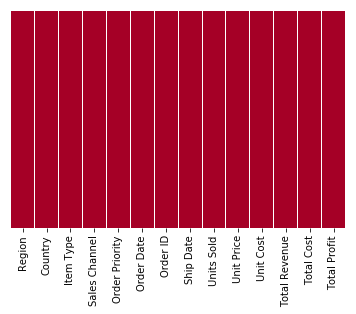

In [0]:
sns.heatmap(sales.isnull(),yticklabels = False, cbar = False , cmap ='RdYlGn')
# The dataset isn't missing any values

In [0]:
pd.unique(sales['Region'].values.ravel())

array(['Middle East and North Africa',
       'Central America and the Caribbean', 'Sub-Saharan Africa',
       'Europe', 'Asia', 'Australia and Oceania', 'North America'],
      dtype=object)

In [0]:
pd.unique(sales['Country'].values.ravel())

array(['Azerbaijan', 'Panama', 'Sao Tome and Principe', 'Belize',
       'Denmark', 'Germany', 'Turkey', 'United Kingdom', 'Kazakhstan',
       'Haiti', 'Italy', 'Malta', 'Jordan', 'Cambodia',
       'Saint Kitts and Nevis ', 'Cameroon', 'Bahrain', 'Solomon Islands',
       'Monaco', 'Comoros', 'Iceland', 'Zambia', 'Egypt', 'Togo',
       'Saudi Arabia', 'Morocco', 'Tunisia ', 'Angola', 'Vietnam',
       'Belarus', 'Myanmar', 'Lithuania', 'Switzerland',
       'Antigua and Barbuda ', 'Mongolia', 'Greenland', 'Eritrea',
       'Saint Vincent and the Grenadines', 'Portugal', 'Somalia',
       'Israel', 'Dominica', 'Luxembourg', 'Singapore', 'Cyprus',
       'Botswana', 'Malawi', 'Kyrgyzstan', 'Macedonia', 'Rwanda',
       'Cape Verde', 'Pakistan', 'Libya', 'Bangladesh', 'Benin',
       'Burundi', 'China', 'Albania', 'Bulgaria',
       'Central African Republic', 'Ukraine', 'Uganda', 'Ghana',
       'Namibia', 'Republic of the Congo', 'Netherlands', 'Australia',
       'Montenegro', 'Iraq

In [0]:
pd.unique(sales['Item Type'].values.ravel())

array(['Snacks', 'Cosmetics', 'Fruits', 'Personal Care', 'Household',
       'Clothes', 'Vegetables', 'Office Supplies', 'Beverages', 'Meat',
       'Cereal', 'Baby Food'], dtype=object)

In [0]:
pd.unique(sales['Sales Channel'].values.ravel())

array(['Online', 'Offline'], dtype=object)

In [0]:
pd.unique(sales['Order Priority'].values.ravel())

array(['C', 'L', 'M', 'H'], dtype=object)

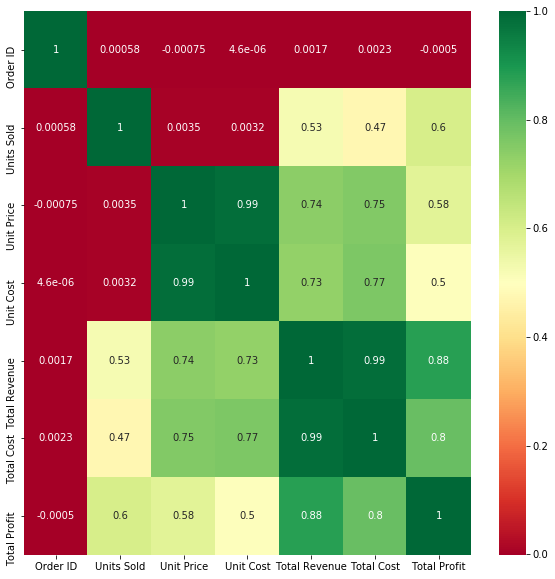

In [0]:
corrmat = sales.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(sales[top_corr_features].corr(),annot = True, cmap = 'RdYlGn')

In [0]:
sales.dtypes


Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [0]:
from sklearn.model_selection import train_test_split
X = sales.iloc[:,8:12].values
y = sales.iloc[:,13].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3,random_state = 0)

In [0]:
from sklearn.linear_model import LinearRegression as lm
model = lm().fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.9510596773789015